# IMAGE RECOGNITION : SVM / GridSearchCV / RandomizedSearchCV / MNIST

# DATA LOADING 

here's a way to download the MNIST database.

You can find more information about the data on the officiel page : [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/) 

In [ ]:
'load the data from the datasets keras library'

from tensorflow.keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data() 


# DATA VISUALIZATION

In [ ]:
# import numpy library
import numpy as np 
print("Number of training samples : " ,x_train.shape[0]) 
print("Number of test samples :" ,y_test.shape[0])
print("Image size :", x_train.shape[1], "*" , x_train.shape[2])
print("Number of classes :", len(np.unique(y_train)))

Number of training samples :  60000
Number of test samples : 10000
Image size : 28 * 28
Number of classes : 10


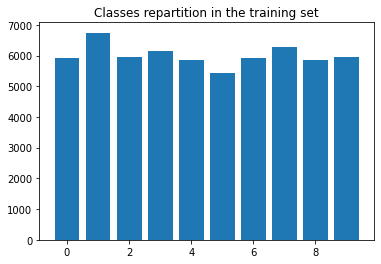

In [ ]:
import matplotlib.pyplot as plt

'CLASS REPARTITON'

plt.bar([0,1,2,3,4,5,6,7,8,9],
        [len(y_train[y_train == 0]),
         len(y_train[y_train == 1]),
         len(y_train[y_train == 2]),
         len(y_train[y_train == 3]),
         len(y_train[y_train == 4]),
         len(y_train[y_train == 5]),
         len(y_train[y_train == 6]),
         len(y_train[y_train == 7]),
         len(y_train[y_train == 8]),
         len(y_train[y_train == 9])])
plt.title("Classes repartition in the training set")
plt.show()



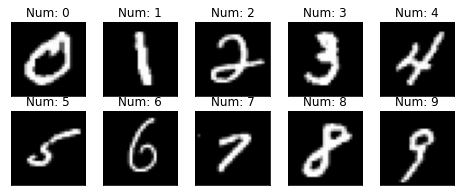

In [ ]:
import numpy as np
%matplotlib inline

'VISUALIZATION OF SOME SAMPLES'

num_classes = len(np.unique(y_train)) 
fig = plt.figure(figsize=(8,3)) 
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    features_idx = x_train[y_train[:]==i,:]
    ax.set_title("Num: " + str(i))
    plt.imshow(features_idx[1], cmap="gray")
    
plt.show()

# DATA PREPROCESSING

In [ ]:
'DATA NORMALISATION' 

x_train = x_train.reshape(60000,784) #  each images are reshaping on one line 
x_train = x_train/255.0 # then all images are normalize, cause the color goes to 0 to 255 ,
                        # divinding par 255 scale the data between 0 and 1
print("Shape of x_train :",x_train.shape)

x_test = x_test.reshape(10000,784)
x_test = x_test/255.0
print("Shape of x_test : ", x_test.shape)


Shape of x_train : (60000, 784)
Shape of x_test :  (10000, 784)


# MODULE USED 

In [ ]:
from sklearn.metrics import classification_report , f1_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.svm import SVC
import pandas as pd 

In [ ]:
'function that convert seconds in hours'

def temps(seconde):
    heure = seconde //3600
    seconde %= 3600
    minute = seconde//60
    seconde = seconde//60
    return print("temps d'execution : ",heure,"heure(s)",minute,"minute(s)",seconde,"seconde(s)")
 

#Implemention of SVM classifiers with different parameters and kernel : 

Different classifier will be implement in order to find the one that fit the best with our problem. 

The following kernel will be implement :
- linear 
- rbf
- sigmoid
- polynomial

The best hyperparameters for each kernel will be find with GreadSearchCV or RandomizedSerchCV methods.

Let's have a look about the algorithm that's gonna be used to perform the training. You can find more complete explanation on [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)

In [ ]:
classifieur = SVC(C=0.1, # C, common to all SVM kernels, trades off misclassification of training examples against simplicity 
                          # of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying
                          # all training examples correctly.
                   
                  kernel='rbf', # kernel function , predefined function : 'poly', 'sigmoid', 'linear'
                   
                  degree=3, # Degree of the polynomial kernel function, if the kernel is a polynomial function, ignor otherwise 
                   
                  gamma='scale',# gamma defines how much influence a single training example has. 
                                # The larger gamma is, the closer other examples must be to be affected.
                                # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
                                # where X is the training set
                                # if ‘auto’, uses 1 / n_features.
                  coef0=0.0,
                   
                  shrinking=True, 
                   
                  probability=False, 
                   
                  tol=0.001,
                   
                  cache_size=200,
                   
                  class_weight=None, # allow to "take care" of unbalance data, but in our case , the data is well balance
                   # as we can see in the DATA VISUALIZATION part

                  verbose=False, 
                   
                  max_iter=-1,
                   
                  decision_function_shape='ovo', # Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) 
                                                 # as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has 
                                                 # shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used
                                                 # as multi-class strategy. The parameter is ignored for binary classification.
                   
                  break_ties=False,
                   
                  random_state=None)

# MULTILABELS CLASSIFICATION

#Linear kernel 
parameters : 
- c (soft margin)

To find the best hyperparameters, GridSearchCV will be implement. This function use croos-validation, which means it split the training set into n distinct folds (5 by default). Then it trains and evaluates the model n times, picking a different folds evaluation every time and training on the other n-(n-1) folds. The GridSearchCV function implements all the possible combination of given parameters.

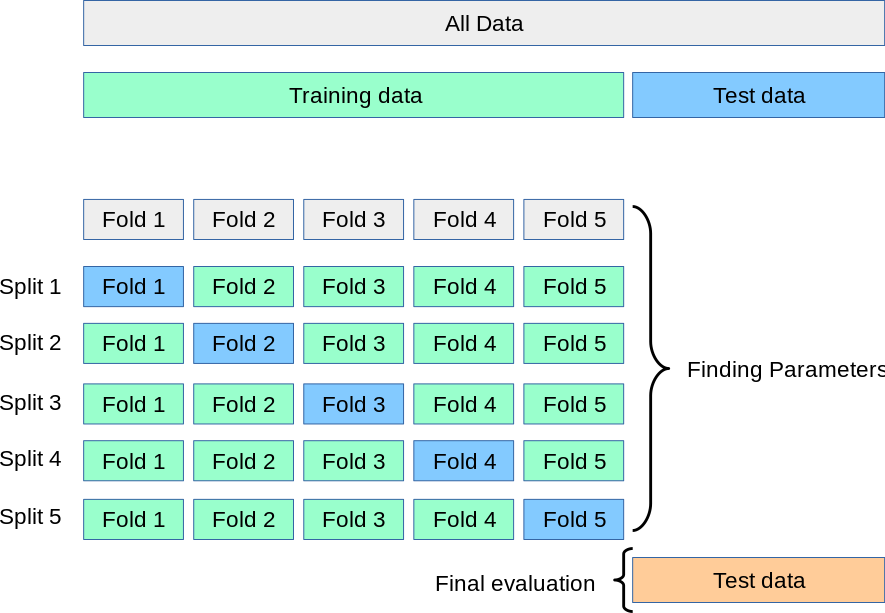

In [ ]:
parameters = {'kernel':['linear'],'C': [0.01,0.1,1,10,100] } 

In [ ]:
# DO NOT RUN THIS CELL ANYMORE  !!!!!!!!!! # 
import time 

start = time.time()

svc = SVC(decision_function_shape = 'ovo', random_state=0)

linear_classifier = GridSearchCV(svc,
                                 parameters,
                                 n_jobs=-1) 

linear_classifier.fit(x_train,y_train)

end = time.time()
temps(end-start)

temps d'execution :  3.0 heure(s) 21.0 minute(s) 21.0 seconde(s)


In [ ]:
# DO NOT RUN THIS CELL ANYMORE !!! #
result_linear_classifier = pd.DataFrame(linear_classifier.cv_results_)
result_linear_classifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,467.992483,6.589162,208.598248,2.376669,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.940583,0.935250,0.934833,0.932333,0.942000,0.937000,0.003671,2
1,337.992997,3.910875,155.661547,2.053456,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.945917,0.939000,0.938667,0.935667,0.944583,0.940767,0.003863,1
2,411.709507,6.237398,143.581352,1.703904,1,linear,"{'C': 1, 'kernel': 'linear'}",0.938333,0.929167,0.931667,0.929333,0.938583,0.933417,0.004211,3
3,601.792879,13.421617,140.968786,1.499404,10,linear,"{'C': 10, 'kernel': 'linear'}",0.928333,0.917500,0.920667,0.919250,0.926417,0.922433,0.004202,4
4,1792.178983,242.048297,136.335201,3.559942,100,linear,"{'C': 100, 'kernel': 'linear'}",0.922667,0.912500,0.917333,0.916000,0.922333,0.918167,0.003876,5


Cause it is a classification problem, and data are balance, it is assume that the accuaracy is chosen to evaluate the performence of the model, except for the final evaluation, f1_score will be use. So according to our cross validation board, it appears that parameter C = 0.1 gives the best result with linear kernel


In [ ]:
## DO NOT RUN ANYMORE ##
import time 

start = time.time()

linear_classifier = SVC(decision_function_shape = 'ovo',
                        random_state=0,
                        C = 0.1,
                        kernel = 'linear',
                        cache_size = 400)

linear_classifier.fit(x_train,y_train)
linear_classifier_predicted = linear_classifier.predict(x_test)
print("CLASSIFICATION REPORT :","\n",classification_report(y_test,linear_classifier_predicted),"\n")
print("f1_score : ",f1_score(y_test,linear_classifier_predicted, average = 'micro'))
end = time.time()
temps(end-start)

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.91      0.94      0.93      1010
           4       0.94      0.96      0.95       982
           5       0.92      0.90      0.91       892
           6       0.96      0.96      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000
 

f1_score :  0.9472
temps d'execution :  0.0 heure(s) 10.0 minute(s) 10.0 seconde(s)


#Radial Basis Function Kernel
parameters : 
- C
- gamma





In [ ]:
rbf_parameters = {'kernel':['rbf'], 'C':[0.1,1,10], 'gamma':['scale','auto'],}

In [ ]:
# DO NOT RUN THIS CELL EVER !!!! #
import time 

start = time.time()

svc3 = SVC(decision_function_shape = 'ovo', random_state=0)

rbf_classifier = GridSearchCV(svc3,
                              rbf_parameters,
                              n_jobs = -1)

rbf_classifier.fit(x_train,y_train)

end = time.time()
temps(end - start)

temps d'execution :  4.0 heure(s) 39.0 minute(s) 39.0 seconde(s)


In [ ]:
# DO NOT RUN THIS CELL ANYMORE # 
result_rbf_classifier = pd.DataFrame(rbf_classifier.cv_results_)
result_rbf_classifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,942.989047,6.940983,325.245341,2.344513,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.956583,0.953917,0.951000,0.952083,0.959250,0.954567,0.003010,4
1,1840.780950,23.217837,527.818918,1.920301,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.909000,0.903917,0.901083,0.900667,0.915000,0.905933,0.005421,6
2,442.190451,4.542210,186.584992,1.173843,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.979417,0.976333,0.976167,0.974167,0.978583,0.976933,0.001870,2
3,724.659070,9.611260,289.506801,2.212248,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.938667,0.934333,0.933167,0.931667,0.942333,0.936033,0.003919,5
4,396.278383,1.823655,178.077946,1.681530,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.984667,0.982833,0.979583,0.978833,0.983750,0.981933,0.002311,1
5,375.391247,10.047711,176.750744,4.615327,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.960250,0.956083,0.955250,0.953667,0.960917,0.957233,0.002851,3


According to our cross validation board, it appears that parameter C = 10, gamma = 'scale'  gives the best result with rbf kernel

In [ ]:
# DO NOT RUN ANYMORE # 
import time 

start = time.time()

rbf_classifier = SVC(decision_function_shape = 'ovo',
                     random_state=0,
                     C = 10,
                     kernel = 'rbf',
                     gamma = 'scale')

rbf_classifier.fit(x_train,y_train)
rbf_classifier_predicted = rbf_classifier.predict(x_test)
print(classification_report(y_test,rbf_classifier_predicted))
print("f1_score : ",f1_score(y_test,rbf_classifier_predicted, average = 'micro'))
end = time.time()
temps(end-start)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

f1_score :  0.9837
temps d'execution :  0.0 heure(s) 11.0 minute(s) 11.0 seconde(s)


#Sigmoid Kernel
- C
- coef0

it is assume, that due to high cost computation I could not try more parameters such as gamma

In [ ]:
sigmoid_parameters = {'kernel':['sigmoid'], 'C':[0.1,1,10], 'coef0':[-1,0,1]}

In [ ]:
# DO NOT RUN ANYMORE #
import time 

start = time.time()

svc4 = SVC(decision_function_shape = 'ovo', random_state=0)

sigmoid_classifier = GridSearchCV(svc4,
                                  sigmoid_parameters,
                                  n_jobs = -1)

sigmoid_classifier.fit(x_train,y_train)

end = time.time()
temps(end - start)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


temps d'execution :  8.0 heure(s) 1.0 minute(s) 1.0 seconde(s)


In [ ]:
# DO NOT RUN ANYMORE #
result_sigmoid_classifier = pd.DataFrame(sigmoid_classifier.cv_results_)
result_sigmoid_classifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,988.465571,6.496825,326.347221,2.216219,0.1,-1,sigmoid,"{'C': 0.1, 'coef0': -1, 'kernel': 'sigmoid'}",0.936833,0.935000,0.932167,0.932167,0.941750,0.935583,0.003557,1
1,1163.873313,11.951741,416.028177,3.054999,0.1,0,sigmoid,"{'C': 0.1, 'coef0': 0, 'kernel': 'sigmoid'}",0.849250,0.837833,0.838083,0.837083,0.856250,0.843700,0.007721,4
2,2165.096154,13.944641,609.612753,2.172607,0.1,1,sigmoid,"{'C': 0.1, 'coef0': 1, 'kernel': 'sigmoid'}",0.818750,0.805000,0.807750,0.806833,0.828750,0.813417,0.009054,5
3,388.671851,3.503998,178.792832,1.861496,1,-1,sigmoid,"{'C': 1, 'coef0': -1, 'kernel': 'sigmoid'}",0.915917,0.908250,0.911750,0.909333,0.919583,0.912967,0.004229,2
4,645.460762,22.219877,271.604198,2.454963,1,0,sigmoid,"{'C': 1, 'coef0': 0, 'kernel': 'sigmoid'}",0.775583,0.765333,0.773917,0.768833,0.793250,0.775383,0.009647,6
5,1078.135416,13.512797,390.780231,4.119150,1,1,sigmoid,"{'C': 1, 'coef0': 1, 'kernel': 'sigmoid'}",0.704667,0.691167,0.704583,0.706750,0.729917,0.707417,0.012541,8
6,238.052054,3.421368,129.082148,2.444791,10,-1,sigmoid,"{'C': 10, 'coef0': -1, 'kernel': 'sigmoid'}",0.895667,0.888583,0.888167,0.887333,0.896250,0.891200,0.003910,3
7,530.933314,14.183119,246.057359,4.650501,10,0,sigmoid,"{'C': 10, 'coef0': 0, 'kernel': 'sigmoid'}",0.760000,0.750417,0.757000,0.755333,0.783583,0.761267,0.011582,7
8,811.988011,12.055033,323.280637,7.503480,10,1,sigmoid,"{'C': 10, 'coef0': 1, 'kernel': 'sigmoid'}",0.668167,0.655250,0.670583,0.667000,0.699167,0.672033,0.014562,9


According to our cross vvalidation board, it appears that C = 0.1 , coef0 = -1 and give the best parameters for the sigmoid kernel

In [ ]:
# DO NOT RUN ANYMORE # 
import time 

start = time.time()

sigmoid_classifier = SVC(decision_function_shape = 'ovo',
                         random_state=0,
                         C = 0.1,
                         kernel = 'sigmoid',
                         coef0 = -1)

sigmoid_classifier.fit(x_train,y_train)
sigmoid_classifier_predicted = sigmoid_classifier.predict(x_test)
print(classification_report(y_test,sigmoid_classifier_predicted))
print("f1_score : ",f1_score(y_test,sigmoid_classifier_predicted, average = 'micro'))
end = time.time()
temps(end-start)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.93      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.93      0.95      0.94       982
           5       0.94      0.91      0.92       892
           6       0.95      0.96      0.96       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.91      0.91       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

f1_score :  0.9404
temps d'execution :  0.0 heure(s) 27.0 minute(s) 27.0 seconde(s)


#Polynomial Kernel 

parameters : 
- degree 
- gamma
- coef
- C

In [ ]:
polynomial_parameters = {'kernel': ['poly'], 'degree': [2,3],'coef0':[-1,0,1], 'C':[0.1,1,10]}

In [ ]:
# DO NOT RUN ANYMORE # 
import time 

start = time.time()

svc2 = SVC(decision_function_shape = 'ovo', random_state=0)
polynomial_classifier = RandomizedSearchCV(svc2, polynomial_parameters, random_state = 0, n_jobs = -1, n_iter = 10)
polynomial_classifier.fit(x_train,y_train)

end = time.time()
temps(end - start)
# I agree it's useless to use RandomizedSearchCV with n_iter = 1, but for all the n_iter I tried it crashed 

I tried to run RandomizedSearchCV to implement an alternative way to find the best hyperparameters. The difference between GridSearchCV and RandomizedSearchCV is that instead of trying all parameters given, RandomizedSearchCV will 'randomly' took some of them. Nevertheless,  the computation never succed over n_iter = 1, which is useless. When I tried to run more than n_iter = 1, everytime the notebook reload by itself or crash, even if I keep the session active. 


In [ ]:
# DO NOT RUN ANYMORE # 
import time 

start = time.time()

polynomial_classifier = SVC(decision_function_shape = 'ovo',
                            random_state=0,
                            C = 1,
                            kernel = 'poly',
                            coef0 = -1,
                            degree = 3)

polynomial_classifier.fit(x_train,y_train)
polynomial_classifier_predicted = polynomial_classifier.predict(x_test)
print(classification_report(y_test,polynomial_classifier_predicted))
print("f1_score : ",f1_score(y_test,polynomial_classifier_predicted, average = 'micro'))
end = time.time()
temps(end-start)

              precision    recall  f1-score   support

           0       0.80      0.44      0.57       980
           1       0.42      0.74      0.54      1135
           2       0.40      0.34      0.37      1032
           3       0.67      0.28      0.40      1010
           4       0.52      0.45      0.48       982
           5       0.18      0.26      0.21       892
           6       0.81      0.39      0.52       958
           7       0.86      0.48      0.61      1028
           8       0.18      0.24      0.20       974
           9       0.26      0.45      0.33      1009

    accuracy                           0.41     10000
   macro avg       0.51      0.41      0.42     10000
weighted avg       0.51      0.41      0.43     10000

f1_score :  0.4121
temps d'execution :  0.0 heure(s) 46.0 minute(s) 46.0 seconde(s)


# ranking 

1.  rbf kernel , f1_score = 0.9837
2.  sigmoid kernel , f1_score = 0.9404
3.  linear kernel, f1_score = 0.9472
4.  polynomial kernel , f1_score = 0.4121








#Custom Kernel

Now, the Custom Kernel part. 
I read a lot of papers about kernels, and I actually find a good one on the scikit-learn website [1] that give the following properties : 

Properties :

- A necessary and sufficient condition for a function k(x, x) to be a valid kernel (Shawe- Taylor and Cristianini, 2004) is that the Gram matrix K, whose elements are given by k(xn, xm), should be positive semidefinite for all possible choices of the set {xn}.


- Techniques for Constructing New Kernels :
Given valid kernels k1(x, x) and k2(x, x), the following new kernels will also be valid:

  k(x,x') = k1(x,x') + k2(x,x')

  k(x,x') = k1(x, x')k2(x, x')


[1] Bishop, Pattern recognition and machine learning, chapter 7 Sparse Kernel Machines

So, for our custom kernel, we're gonna build two custom kernel, based on linear kernel. Using the definition above.


I really wanted to confront my other kernel to my custom kernel, unfortunatly , my computer couldn't support the computation. So I had to reduce the amount of data to compute it. The following error message appears when I tried to compute it. 


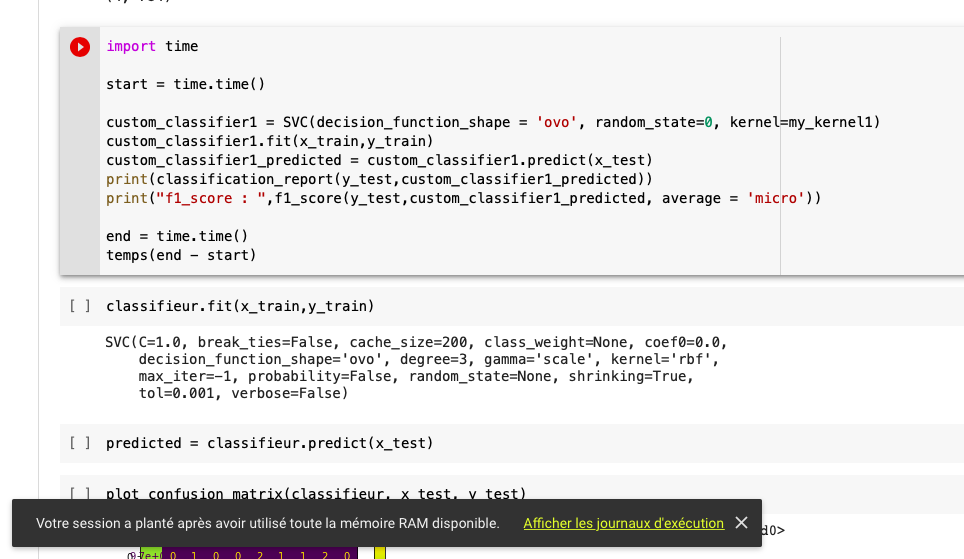

That's why, I had to reduce the multi-classification task to a binary classification.


# KERNEL

In [ ]:
import numpy as np 

def my_kernel1(X, Y):
  return np.dot(X, Y.T) * np.dot(X, Y.T) 

def my_kernel2(X,Y):
  return np.dot(X,Y.T) + np.dot(X,Y.T)


# BINARY CLASSIFICATION
 Let's apply a classification for the number 0 and 8. 


In [ ]:
class1 = 0 
class2 = 8 
nameClass1 = '0'
nameClass2 = '8'
mesClassesTrain = (y_train==class1)|(y_train==class2) # contains booleans True when y_train = 0 or y_train = 8
mesClassesTest = (y_test==class1)|(y_test==class2) # containes booleans True when y_test = 0 or y_test = 8

## TRAIN
x_trainBinaire = np.array(x_train[mesClassesTrain,:]) # using a mask we then select all the classes equal to 0 and 8
y_trainBinaire = np.array((y_train[mesClassesTrain])) # unsing a mask all the element in 'position True' are selected 
print("Number of sample in the training set :", x_trainBinaire.shape[0])

## TEST
x_testBinaire = np.array(x_test[mesClassesTest,:])
y_testBinaire = np.array((y_test[mesClassesTest]))
print("Number of sample in the testing set :", x_testBinaire.shape[0])



Number of sample in the training set : 11774
Number of sample in the testing set : 1954


# FIRST CLASSIFIER

In [ ]:
# DO NOT RUN ANYMORE # 
import time 
parameters = {'kernel':['poly','sigmoid'],
              'C': [0.01,0.1,1,10,100],
              'degree' :[2,3],
              'coef0':[-1,0,1] ,
              'gamma' : ['scale','auto']} 

start = time.time()

svc = SVC(decision_function_shape = 'ovo', random_state=0)

classifier = RandomizedSearchCV(svc,
                                parameters,
                                random_state = 0,
                                n_jobs = -1,
                                n_iter = 15)
classifier.fit(x_trainBinaire,y_trainBinaire)

end = time.time()
temps(end - start)

temps d'execution :  0.0 heure(s) 47.0 minute(s) 47.0 seconde(s)


In [ ]:
# DO NOT RUN ANYMORE #
result_classifier = pd.DataFrame(classifier.cv_results_)
result_classifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,param_coef0,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,139.906011,2.100322,30.778669,0.582988,poly,scale,2,-1,1,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.070488,0.057325,0.047983,0.059023,0.048853,0.056735,0.008167,13
1,5.230696,0.210476,0.915343,0.031105,poly,auto,3,1,10,"{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.996603,0.997452,0.993631,0.991932,0.993628,0.994649,0.002056,2
2,9.035555,0.161960,1.684246,0.033313,sigmoid,auto,3,1,10,"{'kernel': 'sigmoid', 'gamma': 'auto', 'degree...",0.993206,0.992781,0.989809,0.987261,0.991079,0.990827,0.002158,3
3,43.424194,0.385903,9.790718,0.171526,poly,scale,2,0,0.01,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.987261,0.986412,0.985138,0.982166,0.984282,0.985052,0.001770,5
4,3.620305,0.014204,0.650106,0.017266,sigmoid,scale,2,-1,100,"{'kernel': 'sigmoid', 'gamma': 'scale', 'degre...",0.972824,0.978344,0.975372,0.977919,0.981308,0.977153,0.002870,7
5,70.166533,0.544095,15.517599,0.155699,poly,auto,3,1,0.01,"{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.977495,0.977919,0.979193,0.973673,0.974936,0.976643,0.002029,8
6,148.743156,0.337116,33.464939,0.373357,sigmoid,auto,3,-1,0.01,"{'kernel': 'sigmoid', 'gamma': 'auto', 'degree...",0.962208,0.966030,0.971125,0.963057,0.960918,0.964668,0.003640,10
7,145.075058,0.912064,32.205072,0.304509,poly,auto,2,0,0.01,"{'kernel': 'poly', 'gamma': 'auto', 'degree': ...",0.503185,0.503185,0.503185,0.502760,0.502974,0.503058,0.000170,12
8,37.307943,0.353636,8.124779,0.039271,sigmoid,scale,3,1,0.1,"{'kernel': 'sigmoid', 'gamma': 'scale', 'degre...",0.974947,0.976221,0.977495,0.970701,0.977060,0.975285,0.002451,9
9,10.412785,0.320237,2.100533,0.039027,sigmoid,scale,2,1,10,"{'kernel': 'sigmoid', 'gamma': 'scale', 'degre...",0.937155,0.932484,0.925690,0.938004,0.943925,0.935452,0.006088,11


According to the cross-validation board, it appears that the kernel polynomial with the following parameters : C = 1 ,coef0 = 0, degree = 3, give the best results

In [ ]:
# DO NOT RUN ANYMORE #
import time 

start = time.time()

classifier = SVC(decision_function_shape = 'ovo',
                 random_state=0,
                 kernel='poly',
                 degree = 3,
                 coef0 = 0,
                 C = 1)

classifier.fit(x_trainBinaire,y_trainBinaire)
classifier_predicted = classifier.predict(x_testBinaire)
print(classification_report(y_testBinaire,classifier_predicted))
print("f1_score : ",f1_score(y_testBinaire,classifier_predicted, average = 'micro'))

end = time.time()
temps(end - start)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           8       0.99      0.99      0.99       974

    accuracy                           0.99      1954
   macro avg       0.99      0.99      0.99      1954
weighted avg       0.99      0.99      0.99      1954

f1_score :  0.9938587512794268
temps d'execution :  0.0 heure(s) 0.0 minute(s) 0.0 seconde(s)


# my_kernel1 classifier

In [ ]:
# DO NOT RUN ANYMORE # 
import time 
parameters = {'kernel':[my_kernel1],
              'C': [0.01,0.1,1,10,100],
              'gamma' : ['scale','auto', 0.1, 0.5, 1, 10]} 

start = time.time()

svc = SVC(decision_function_shape = 'ovo', random_state=0)

classifier = RandomizedSearchCV(svc,
                                parameters,
                                random_state = 0,
                                n_jobs = -1,
                                n_iter = 15)
classifier.fit(x_trainBinaire,y_trainBinaire)

end = time.time()
temps(end - start)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


temps d'execution :  0.0 heure(s) 9.0 minute(s) 9.0 seconde(s)


In [ ]:
# DO NOT RUN ANYMORE #
result_classifier = pd.DataFrame(classifier.cv_results_)
result_classifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.516046,0.230099,4.565216,0.335517,<function my_kernel1 at 0x7f5aed7e5ea0>,0.1,0.01,{'kernel': <function my_kernel1 at 0x7f5aed7e5...,0.997452,0.997877,0.994055,0.994904,0.997026,0.996263,0.001505,1
1,10.870380,0.553428,4.683601,0.284901,<function my_kernel1 at 0x7f5aed7e5ea0>,1,100,{'kernel': <function my_kernel1 at 0x7f5aed7e5...,0.997452,0.997877,0.994055,0.994904,0.997026,0.996263,0.001505,1
2,10.743500,0.323908,4.478761,0.095517,<function my_kernel1 at 0x7f5aed7e5ea0>,auto,1,{'kernel': <function my_kernel1 at 0x7f5aed7e5...,0.997452,0.997877,0.994055,0.994904,0.997026,0.996263,0.001505,1
3,10.587801,0.260369,4.442144,0.154836,<function my_kernel1 at 0x7f5aed7e5ea0>,1,0.1,{'kernel': <function my_kernel1 at 0x7f5aed7e5...,0.997452,0.997877,0.994055,0.994904,0.997026,0.996263,0.001505,1
4,10.611326,0.376527,4.369562,0.062450,<function my_kernel1 at 0x7f5aed7e5ea0>,0.1,100,{'kernel': <function my_kernel1 at 0x7f5aed7e5...,0.997452,0.997877,0.994055,0.994904,0.997026,0.996263,0.001505,1
5,10.106279,0.175450,4.340415,0.102270,<function my_kernel1 at 0x7f5aed7e5ea0>,scale,100,{'kernel': <function my_kernel1 at 0x7f5aed7e5...,0.997452,0.997877,0.994055,0.994904,0.997026,0.996263,0.001505,1
6,10.247456,0.114100,4.327521,0.038783,<function my_kernel1 at 0x7f5aed7e5ea0>,0.5,100,{'kernel': <function my_kernel1 at 0x7f5aed7e5...,0.997452,0.997877,0.994055,0.994904,0.997026,0.996263,0.001505,1
7,10.069676,0.150329,4.334924,0.089263,<function my_kernel1 at 0x7f5aed7e5ea0>,10,0.1,{'kernel': <function my_kernel1 at 0x7f5aed7e5...,0.997452,0.997877,0.994055,0.994904,0.997026,0.996263,0.001505,1
8,10.453313,0.118697,4.276576,0.083799,<function my_kernel1 at 0x7f5aed7e5ea0>,10,1,{'kernel': <function my_kernel1 at 0x7f5aed7e5...,0.997452,0.997877,0.994055,0.994904,0.997026,0.996263,0.001505,1
9,10.154743,0.152574,4.390557,0.116869,<function my_kernel1 at 0x7f5aed7e5ea0>,1,10,{'kernel': <function my_kernel1 at 0x7f5aed7e5...,0.997452,0.997877,0.994055,0.994904,0.997026,0.996263,0.001505,1


It appears that all the parameters lead to the same results. 

In [ ]:
import time 

start = time.time()

custom_classifier1 = SVC(decision_function_shape = 'ovo',
                         random_state=0,
                         kernel=my_kernel1)

custom_classifier1.fit(x_trainBinaire,y_trainBinaire)
custom_classifier1_predicted = custom_classifier1.predict(x_testBinaire)
print(classification_report(y_testBinaire,custom_classifier1_predicted))
print("f1_score : ",f1_score(y_testBinaire,custom_classifier1_predicted, average = 'micro'))

end = time.time()
temps(end - start)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           8       1.00      0.99      1.00       974

    accuracy                           1.00      1954
   macro avg       1.00      1.00      1.00      1954
weighted avg       1.00      1.00      1.00      1954

f1_score :  0.9959058341862845
temps d'execution :  0.0 heure(s) 0.0 minute(s) 0.0 seconde(s)


# my_kernel2 classifier

In [ ]:
# DO NOT RUN ANYMORE # 
import time 
parameters = {'kernel':[my_kernel2],
              'C': [0.01,0.1,1,10,100],
              'gamma' : ['scale','auto', 0.1, 0.5, 1, 10]} 

start = time.time()

svc = SVC(decision_function_shape = 'ovo', random_state=0)

classifier = RandomizedSearchCV(svc,
                                parameters,
                                random_state = 0,
                                n_jobs = -1,
                                n_iter = 15)
classifier.fit(x_trainBinaire,y_trainBinaire)

end = time.time()
temps(end - start)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


temps d'execution :  0.0 heure(s) 8.0 minute(s) 8.0 seconde(s)


In [ ]:
# DO NOT RUN ANYMORE #
result_classifier = pd.DataFrame(classifier.cv_results_)
result_classifier

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.040242,0.106941,4.089826,0.054240,<function my_kernel2 at 0x7f33827139d8>,0.1,0.01,{'kernel': <function my_kernel2 at 0x7f3382713...,0.993206,0.994480,0.990658,0.988535,0.992778,0.991931,0.002097,1
1,9.139446,0.130358,4.003055,0.067439,<function my_kernel2 at 0x7f33827139d8>,1,100,{'kernel': <function my_kernel2 at 0x7f3382713...,0.984713,0.981316,0.986412,0.982590,0.985556,0.984118,0.001890,10
2,9.069073,0.072377,4.007848,0.071614,<function my_kernel2 at 0x7f33827139d8>,auto,1,{'kernel': <function my_kernel2 at 0x7f3382713...,0.986837,0.987686,0.988110,0.986412,0.985981,0.987005,0.000789,6
3,8.948133,0.092633,4.049954,0.048398,<function my_kernel2 at 0x7f33827139d8>,1,0.1,{'kernel': <function my_kernel2 at 0x7f3382713...,0.990658,0.994055,0.990234,0.987686,0.991504,0.990827,0.002056,3
4,9.066040,0.103960,3.973308,0.113874,<function my_kernel2 at 0x7f33827139d8>,0.1,100,{'kernel': <function my_kernel2 at 0x7f3382713...,0.984713,0.981316,0.986412,0.982590,0.985556,0.984118,0.001890,10
5,9.155993,0.119004,3.995390,0.128001,<function my_kernel2 at 0x7f33827139d8>,scale,100,{'kernel': <function my_kernel2 at 0x7f3382713...,0.984713,0.981316,0.986412,0.982590,0.985556,0.984118,0.001890,10
6,9.075748,0.119030,4.014127,0.122255,<function my_kernel2 at 0x7f33827139d8>,0.5,100,{'kernel': <function my_kernel2 at 0x7f3382713...,0.984713,0.981316,0.986412,0.982590,0.985556,0.984118,0.001890,10
7,8.872439,0.085738,4.005554,0.099297,<function my_kernel2 at 0x7f33827139d8>,10,0.1,{'kernel': <function my_kernel2 at 0x7f3382713...,0.990658,0.994055,0.990234,0.987686,0.991504,0.990827,0.002056,3
8,8.993831,0.106918,3.983246,0.092467,<function my_kernel2 at 0x7f33827139d8>,10,1,{'kernel': <function my_kernel2 at 0x7f3382713...,0.986837,0.987686,0.988110,0.986412,0.985981,0.987005,0.000789,6
9,9.181901,0.107525,4.016157,0.121669,<function my_kernel2 at 0x7f33827139d8>,1,10,{'kernel': <function my_kernel2 at 0x7f3382713...,0.984713,0.981316,0.986412,0.982590,0.985556,0.984118,0.001890,10


According to the cross-validation board, it appears that the parameters C = 0.01 and gamma = 'scale' give the best results with this kernel.

In [ ]:
# DO not RUN ANYMORE # 
import time 

start = time.time()

custom_classifier1 = SVC(decision_function_shape = 'ovo',
                         random_state=0,
                         C = 0.01,
                         gamma = 'scale',
                         kernel=my_kernel2)

custom_classifier1.fit(x_trainBinaire,y_trainBinaire)
custom_classifier1_predicted = custom_classifier1.predict(x_testBinaire)
print(classification_report(y_testBinaire,custom_classifier1_predicted))
print("f1_score : ",f1_score(y_testBinaire,custom_classifier1_predicted, average = 'micro'))

end = time.time()
temps(end - start)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           8       1.00      0.99      0.99       974

    accuracy                           0.99      1954
   macro avg       0.99      0.99      0.99      1954
weighted avg       0.99      0.99      0.99      1954

f1_score :  0.9933469805527124
temps d'execution :  0.0 heure(s) 0.0 minute(s) 0.0 seconde(s)


# Ranking

1. my_kernel1 classifier , f1_score = 0.9959
2. first classifier , f1_score = 0.9938
3. my_kernel2 classifier , f1_score = 0.9933

# OPENING 

A way top improve those algorithm is to use "data expansion" , which consist to shifiting some images in our training set, to increase the number of samples. 

# EXPERIENCED DIFFICULTIES



The main difficulty encounterd in this project has been the expansive time of computation, and also a lack of ram that lead to failed some computation.

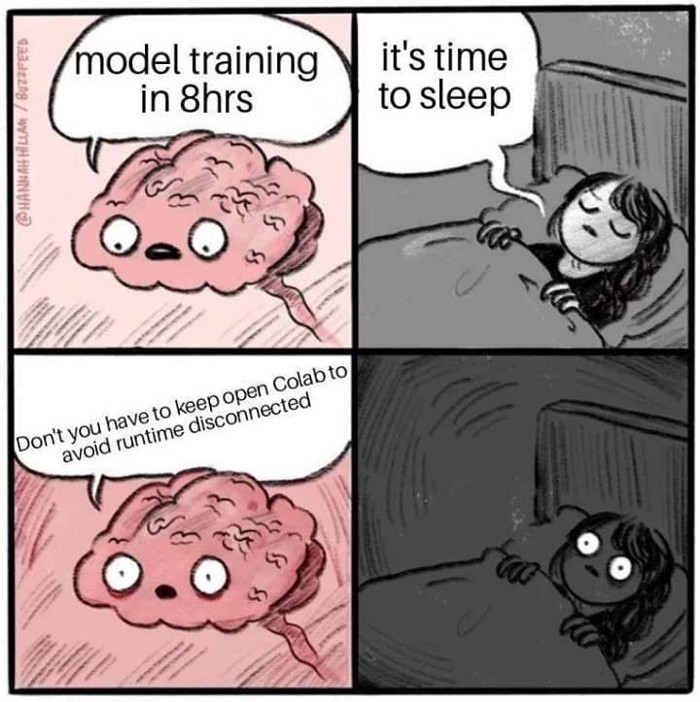

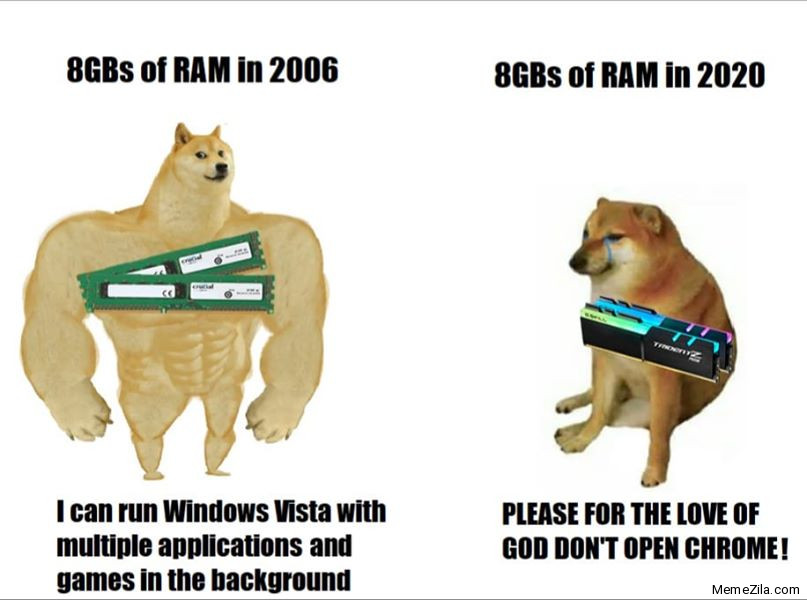